In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-darkgrid')

from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter

myLoc = MultipleLocator(14)

myFmt = DateFormatter('%Y/%m')

In [2]:
df=pd.read_csv('http://taanila.fi/beer.csv')
df.index=pd.to_datetime(df['Month'])
df=df.drop('Month',axis=1)
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


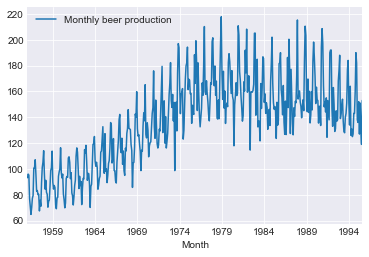

In [3]:
df.plot()

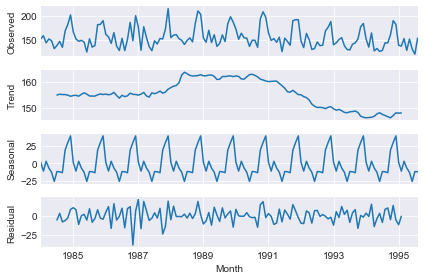

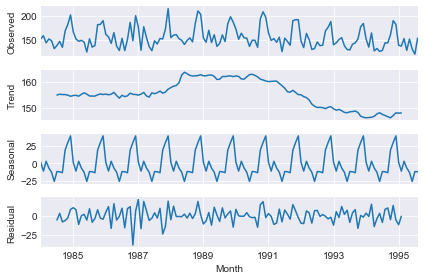

In [4]:
from statsmodels.tsa.api import seasonal_decompose

seasonal_decompose(df['Monthly beer production']['1984':]).plot()

In [5]:
from statsmodels.tsa.api import ExponentialSmoothing

malli = ExponentialSmoothing(df['Monthly beer production'], trend = 'add',
                            seasonal = 'mul', seasonal_periods = 12).fit()

C:\Users\noora\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [6]:
df['Estimate'] = malli.fittedvalues
df.head(20)

,Monthly beer production,Estimate
Month,,
1956-01-01,93.2,88.491458
1956-02-01,96.0,83.735483
1956-03-01,95.2,92.886616
1956-04-01,77.1,84.491332
1956-05-01,70.9,81.972381
1956-06-01,64.8,72.399441
1956-07-01,70.1,77.069468
1956-08-01,77.3,80.304319
1956-09-01,79.5,80.466684


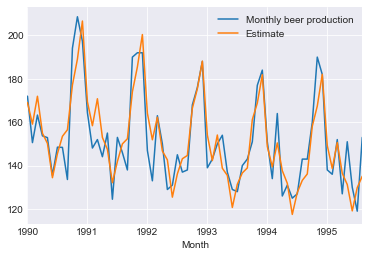

In [7]:
df['1990':].plot()

In [8]:
df['Estimate error'] = malli.resid
df.tail(20)

,Monthly beer production,Estimate,Estimate error
Month,,,
1994-01-01,151.0,148.870520,2.129480
1994-02-01,134.0,139.425000,-5.425000
1994-03-01,164.0,150.456212,13.543788
1994-04-01,126.0,137.657613,-11.657613
1994-05-01,131.0,131.852943,-0.852943
1994-06-01,125.0,117.509765,7.490235
1994-07-01,127.0,127.636410,-0.636410
1994-08-01,143.0,133.185602,9.814398
1994-09-01,143.0,136.148765,6.851235


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('mean squared error', mean_squared_error(df['Monthly beer production']
                                               , df['Estimate']))
print('mean absolute error', mean_absolute_error(df['Monthly beer production'],
                                                 df['Estimate']))

mean squared error 94.84971454713548
mean absolute error 7.3587009329279445


Text(0, 0.5, 'Estimate error')

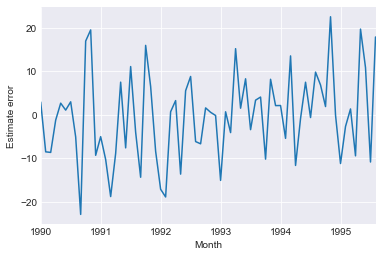

In [10]:
df['Estimate error']['1990':].plot()
plt.ylabel('Estimate error')

Text(0, 0.5, 'Monthly beer production')

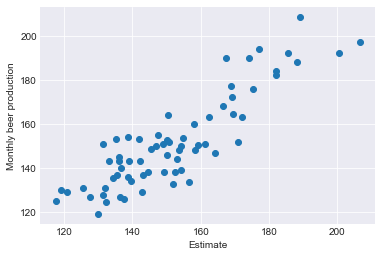

In [11]:
plt.scatter(x = df['Estimate']['1990':], y = df['Monthly beer production']['1990':])
plt.xlabel('Estimate')
plt.ylabel('Monthly beer production')

In [12]:
index = pd.date_range('1995-09-01', periods = 12, freq = 'MS')

ennusteet = malli.forecast(12)

df_ennuste = pd.DataFrame(data = ennusteet, index = index,
                         columns = ['Estimate'])

df_ennuste

,Estimate
1995-09-01,139.111588
1995-10-01,161.038288
1995-11-01,171.223471
1995-12-01,183.565677
1996-01-01,150.339358
1996-02-01,141.092922
1996-03-01,153.910278
1996-04-01,139.264577
1996-05-01,135.842805
1996-06-01,121.610320


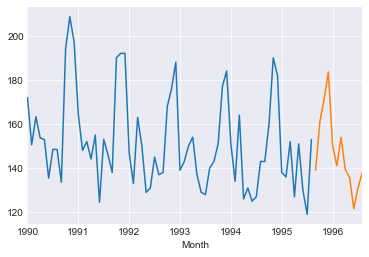

In [13]:
df['Monthly beer production']['1990':].plot()

df_ennuste['Estimate']['1990':].plot()

In [14]:
df = pd.concat([df, df_ennuste])
df

C:\Users\noora\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Estimate,Estimate error,Monthly beer production
1956-01-01,88.491458,4.708542,93.2
1956-02-01,83.735483,12.264517,96.0
1956-03-01,92.886616,2.313384,95.2
1956-04-01,84.491332,-7.391332,77.1
1956-05-01,81.972381,-11.072381,70.9
1956-06-01,72.399441,-7.599441,64.8
1956-07-01,77.069468,-6.969468,70.1
1956-08-01,80.304319,-3.004319,77.3
1956-09-01,80.466684,-0.966684,79.5
1956-10-01,93.083652,7.516348,100.6


In [15]:
malli.params

{'smoothing_level': 0.08886066985259701,
 'smoothing_slope': 0.08885828426829497,
 'smoothing_seasonal': 0.02376313107854774,
 'damping_slope': nan,
 'initial_level': 139.5749444656007,
 'initial_slope': 0.09753352683358595,
 'initial_seasons': array([0.63356403, 0.59602836, 0.65121314, 0.58961693, 0.57551737,
        0.51413207, 0.55253094, 0.580892  , 0.58469246, 0.67795336,
        0.72102791, 0.77511128]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}